Сергей Миллер 494

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
# plt.style.use('ggplot')
from sympy import *
from matplotlib import cm
%matplotlib inline

In [2]:
bar_neon = np.array([2932,2915,2852,2840,2818,2790,
       2780,2746,2738,2724,2712,2702,
       2692,2678,2652,2642,2624,2614,
       2586,2564,2558,2544,2500])
real_neon = np.array([7032,6929,6717,6678,6598,6532,
          6506,6402,6382,6334,6304,6266,
          6217,6163,6143,6096,6074,6030,
          5975,5944,5881,5852,5400])
bar_hg = np.array([2894,2660,2458,2442,2268,1846,1188,658])
real_hg = np.array([690,623,579,577,546,491,435,404])*10

In [3]:
H = np.array([2780,1786,1264])
hv1_0 = 2646
hv1_5 = 2548
hv_gr = 2028
I = np.array([hv1_0, hv1_5, hv_gr])
h = 6.6*1e-34
c = 3e8
d_exp = 10
n = 2
m = np.array([3,4,5])
Z_ne = 10
Z_hg = 80
R_th = 109678 * 1e2

### 1.Атом водорода.

Находим $H_\alpha, H_\beta, H_\gamma$ из каллибровочной таблицы по спектру ртути.

Из полученных данных оцениваем постоянную Ридберга, сравниваем с известным значемнием: $R_{th} = 109678 \text{cm}^{-1}$

Формула для расчета: $\frac{1}{\lambda_{nm}} = RZ^2(\frac{1}{n^2} - \frac{1}{m^2})$

В серии Бальмера: $n=2,m=3,4,5$ (для наблюдаемых $H_\alpha, H_\beta, H_\gamma$)

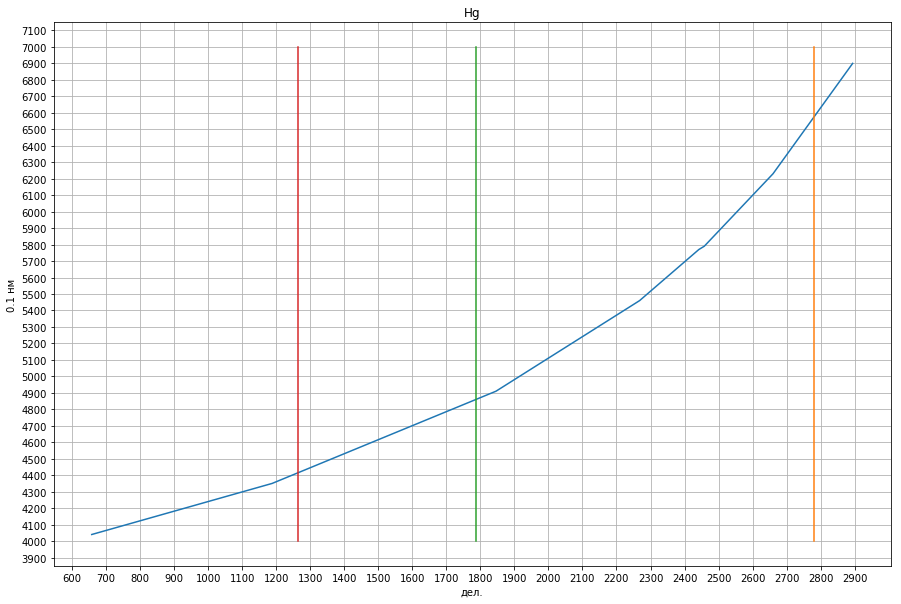

In [4]:
fig = plt.figure(figsize=(15,10))
plt.title('Hg')
ax = fig.gca()
ax.set_xticks(np.arange(500, 3000, 100))
ax.set_yticks(np.arange(3000, 8000, 100))
plt.plot(bar_hg, real_hg)
plt.plot([H[0],H[0]],[4000,7000])
plt.plot([H[1],H[1]],[4000,7000])
plt.plot([H[2],H[2]],[4000,7000])
plt.grid()
plt.ylabel('0.1 нм')
plt.xlabel('дел.')
plt.show()

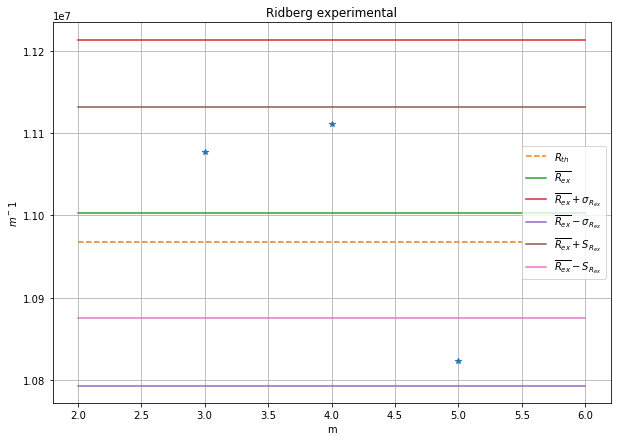

R_ex = 11003515.0035
s_R_ex = 128748.050021
e_std_R_ex = 0.011700629297
e_R_ex = 0.0191082802548


In [47]:
H_real = np.array([6500,4800,4400])*1e-1
R_ex = 1/H_real*1/(1/2**2 - 1/np.array([3,4,5])**2)*1e9
R_ex_m =  np.mean(R_ex)
R_ex_std = np.std(R_ex)
s_H_real = 100 * 1e-1  # из графика
eps_H_real = s_H_real/np.mean(H_real)
s_R_ex = eps_H_real * np.mean(R_ex)
plt.figure(figsize=(10,7))
plt.title('Ridberg experimental')
plt.plot([3,4,5],R_ex,'*')
plt.plot([2,5.5],np.ones(2)*R_th,'--',label=r'$R_{th}$')
plt.plot([2,6],[R_ex_m,R_ex_m],label=r'$\overline{R_{ex}}$')
plt.plot([2,6],np.ones(2)*(R_ex_m + s_R_ex),label=r'$\overline{R_{ex}} + \sigma_{R_{ex}}$')
plt.plot([2,6],np.ones(2)*(R_ex_m - s_R_ex),label=r'$\overline{R_{ex}} - \sigma_{R_{ex}}$')
plt.plot([2,6],np.ones(2)*(R_ex_m + R_ex_std),label=r'$\overline{R_{ex}} + S_{R_{ex}}$')
plt.plot([2,6],np.ones(2)*(R_ex_m - R_ex_std),label=r'$\overline{R_{ex}} - S_{R_{ex}}$')
plt.xlabel('m')
plt.ylabel(r'$m^-1$')
plt.legend(loc='best')
plt.grid()
plt.show()
print('R_ex = '+ str(np.mean(R_ex)))
print('s_R_ex = ' + str(np.std(R_ex)))
print('e_std_R_ex = ' + str(R_ex_std/R_ex_m))
print('e_R_ex = ' + str(s_R_ex/R_ex_m))

Как видно, случайная ошибка измерений очень маленькая ~0.3 % поэтому в качестве погрешности возьмем погрешность аппроксимации.

$R_{ex} = (11.00 \pm 0.12) \cdot 10^6 m^{-1}$

$\varepsilon_{R_{ex}} \approx 2\%$

### 2. Молекула Йода
Находим $h \nu_{1,0} , h \nu_{1,5}, h \nu_{гр}$ из каллибровочной таблицы по спектру неона и ртути.

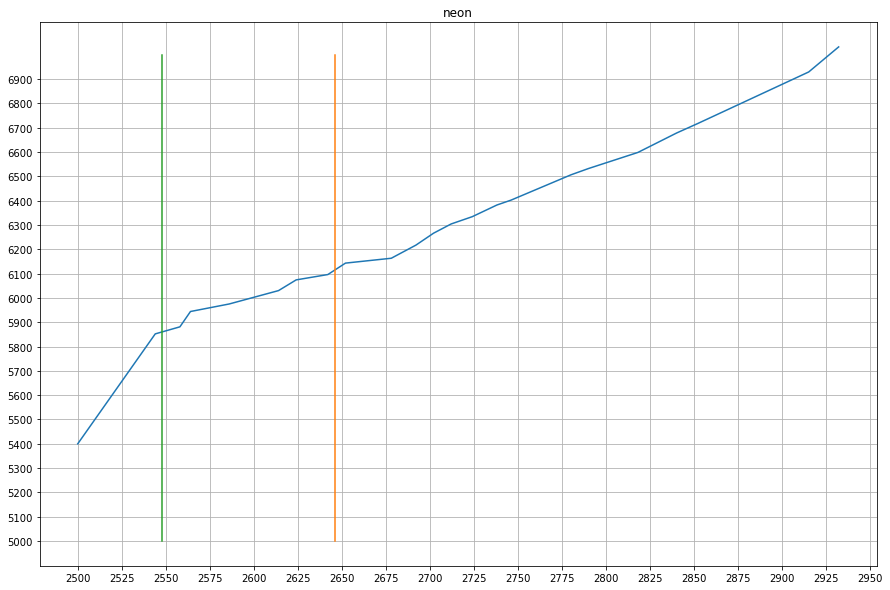

In [27]:
fig = plt.figure(figsize=(15,10))
plt.title('neon')
ax = fig.gca()
ax.set_xticks(np.arange(2400, 3000, 25))
ax.set_yticks(np.arange(5000, 7000, 100))
plt.plot(bar_neon, real_neon)
# ox = np.arange(400,700)
# oy = 5000*np.log(ox/400) + 600
# plt.plot(ox,oy)
plt.plot([I[0],I[0]],[5000,7000])
plt.plot([I[1],I[1]],[5000,7000])
plt.grid()
plt.show()

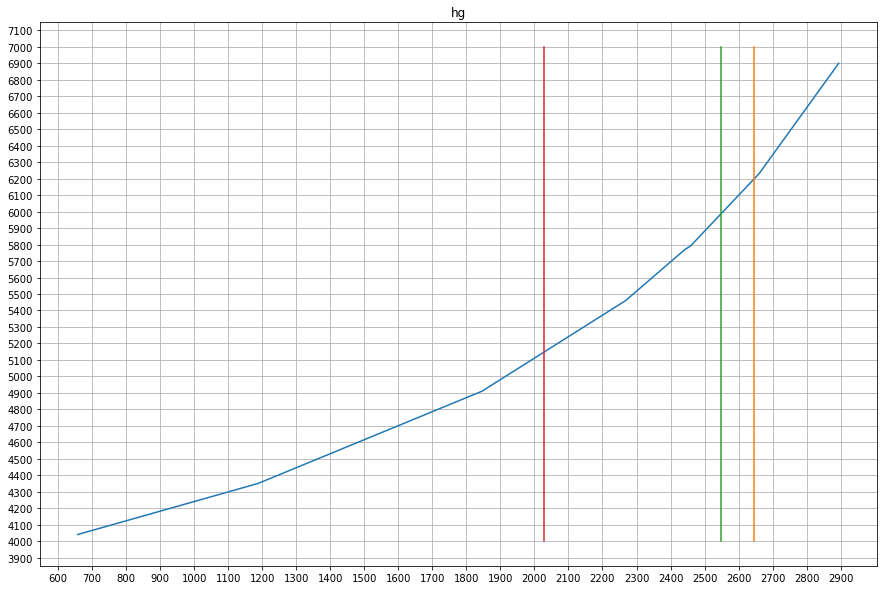

In [85]:
fig = plt.figure(figsize=(15,10))
plt.title('hg')
ax = fig.gca()
ax.set_xticks(np.arange(500, 3000, 100))
ax.set_yticks(np.arange(3000, 8000, 100))
plt.plot(bar_hg, real_hg)
# ox = np.arange(400,700)
# oy = 5000*np.log(ox/400) + 600
# plt.plot(ox,oy)
plt.plot([I[0],I[0]],[4000,7000])
plt.plot([I[1],I[1]],[4000,7000])
plt.plot([I[2],I[2]],[4000,7000])
plt.grid()
plt.show()

In [35]:
I_real = np.array([6200,5900,5100])*1e-1
L10 = 620
L15 = 590
Lg = 510
hv_10 = h*c/L10*1/(1.6*1e-19)*1e9
hv_15 = h*c/L15*1/(1.6*1e-19)*1e9
hv_gr = h*c/Lg*1/(1.6*1e-19)*1e9

Энергия колебательного кванта возбужденного состояния $h\nu_2 \approx \frac{(h \nu_{1,5} - h \nu_{1,0})}{5}$

In [38]:
hv2 = (hv_15 - hv_10)/5
print(hv2)

0.020297977036632008


$hv2 \approx 2 \cdot 10^{-2} эВ$

Знаем, что энергия колебательного кванта основного состояния $h\nu_1 = 0.027 эВ$ и

энергия возбуждения атома $E_a = 0.94 эВ$

![](spektr.png)

![](full_spektr.png)

Рассчитаем:

1) энергию электронного перехода $h\nu_{эл} = h \nu_{1,0} + h \nu_1$

2) энергию диссоциации в основном состоянии $D_1 = h \nu_{гр} - E_a$

3)  энергию диссоциации в основном состоянии $D_2 =  h \nu_{гр} - h\nu_{эл}$

In [40]:
hv1 = 0.027
E_a = 0.94
hv_el = hv_10 + hv1
D1 = hv_gr - E_a
D2 = hv_gr - hv_el

In [46]:
print('hv_el = ' + str(hv_el))
print('D1 = ' + str(D1))
print('D2 = ' + str(D2))
hv_gr_th = 2.440
D1_th = 1.500
eps_hv_gr = abs(hv_gr - hv_gr_th)/hv_gr_th*100
eps_D1 = abs(D1 - D1_th)/D1_th*100
print('eps hv_gr = ' + str(eps_hv_gr))
print('eps D1 = ' + str(eps_D1))

hv_el = 2.0229677419354837
D1 = 1.4864705882352935
D2 = 0.4035028462998098
eps hv_gr = 0.5544840887174777
eps D1 = 0.9019607843137637


 Эталонные значения: диссоциация из основного состояния при попадании кванта света $h\nu_{гр} = 2.440$ на 2 атома один из которых в возбужденном состоянии, она равна $h \nu_{эл} + D_2$.
 Энергия диссоциации из основного состояния $D_1 = 1.500$.
 
 то есть отличие эксперимента от теории небольшое: $\varepsilon_{h\nu_{гр}}\approx0.5\%, \varepsilon_{D_1} \approx 1\%$
 
 (на погрешность измерений забиваем, так как шкала очень точная (относительная погрешность < 1 %))

In [91]:
R = 5*1e-11
ro = 1/R**3 * 1e-31
print(ro)

0.8000000000000003


In [94]:
print(8*1e-3/1.2*760)

5.066666666666667
